# 9.3 High Order Finite Elements



In [1]:
from ngsolve.fem import CompilePythonModule
from pathlib import Path

txt = Path('mymodule.cpp').read_text() 
m = CompilePythonModule(txt, init_function_name='mymodule', add_header=False)

called mymodule


In [2]:
from netgen.occ import unit_square
from ngsolve import *
from ngsolve.webgui import Draw

mesh = Mesh(unit_square.GenerateMesh(maxh=0.2, quad_dominated=False))

We can now create an instance of our own finite element space:

In [3]:
fes = m.MyHighOrderFESpace(mesh, order=4, dirichlet="left|bottom|top")

and use it within NGSolve such as the builtin finite element spaces:

In [4]:
print ("ndof = ", fes.ndof)

ndof =  489


In [5]:
gfu = GridFunction(fes)
gfu.Set(x*x*y*y)

Draw (gfu)
Draw (grad(gfu)[0], mesh);

WebGuiWidget(value={'ngsolve_version': '6.2.2105-146-gf0a662139', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, '…

WebGuiWidget(value={'ngsolve_version': '6.2.2105-146-gf0a662139', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, '…

and solve the standard problem:

In [6]:
u,v = fes.TnT()
a = BilinearForm(grad(u)*grad(v)*dx).Assemble()
f = LinearForm(10*v*dx).Assemble()
gfu.vec.data = a.mat.Inverse(fes.FreeDofs())*f.vec
Draw (gfu, order=3);

WebGuiWidget(value={'ngsolve_version': '6.2.2105-146-gf0a662139', 'mesh_dim': 2, 'order2d': 3, 'order3d': 2, '…

In [7]:
errlist = []
for p in range(1,13):
    fes = m.MyHighOrderFESpace(mesh, order=p)
    func = sin(pi*x)*sin(pi*y)
    gfu = GridFunction(fes)
    gfu.Set(func)
    err = sqrt(Integrate( (func-gfu)**2, mesh, order=5+2*p))
    errlist.append((p,err))
print (errlist)

[(1, 0.01964775389613773), (2, 0.0017679858598923057), (3, 0.00013933794501552366), (4, 7.841805461355655e-06), (5, 5.155110794549977e-07), (6, 1.8004450456708374e-08), (7, 9.751459277549197e-10), (8, 2.5752981965813957e-11), (9, 1.1852131433140115e-12), (10, 3.2231889352436836e-13), (11, 6.435413636446997e-13), (12, 1.1550470445150693e-12)]


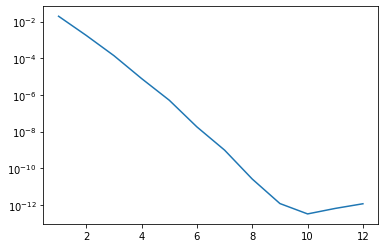

In [8]:
import matplotlib.pyplot as plt
n,err = zip(*errlist)
plt.yscale('log')
plt.plot(n,err);

**Exercises:**

Extend MyHighOrderFESpace by high order quadrilateral elements.

http://www.numa.uni-linz.ac.at/Teaching/PhD/Finished/zaglmayr-diss.pdf, 
page 68 ff